In [2]:
import matplotlib.pyplot as plt
from sklearn.metrics import RocCurveDisplay, auc, roc_curve, roc_auc_score
import pandas as pd
from pickle import load
import numpy as np
from tensorflow import keras

2024-07-08 18:11:53.628008: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-07-08 18:11:55.091831: I external/local_tsl/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2024-07-08 18:11:59.103265: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-07-08 18:11:59.103353: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-07-08 18:11:59.718618: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to

In [3]:
# load data
x_train = pd.read_csv("../../../data/binary_class/x_train_taxahfe_no_sf.csv", index_col=0, header=0)
y_train = pd.read_csv("../../../data/binary_class/y_train_taxahfe.csv", index_col = 0, header = 0 )
sw_train = pd.read_csv("../../../data/binary_class/sw_train_taxahfe.csv", index_col = 0, header = 0 )
x_test = pd.read_csv("../../../data/binary_class/x_test_no_sf.csv", index_col=0, header=0)
y_test = pd.read_csv("../../../data/binary_class/y_test_class.csv", index_col = 0, header = 0 )
x_test = x_test[x_train.columns] # reordered columns to match (column ordered changed during taxahfe)

x_train = x_train.sort_index(axis = 0)
y_train = y_train.sort_index(axis = 0)
x_test = x_test.sort_index(axis = 0)
y_test = y_test.sort_index(axis = 0)

x_train = x_train.reset_index()
y_train = y_train.reset_index()
sw_train = sw_train.reset_index()
x_test = x_test.reset_index()
y_test = y_test.reset_index()

x_train = x_train.drop(columns='SEQN')
y_train = y_train.drop(columns='SEQN')
sw_train = sw_train.drop(columns='SEQN')
x_test = x_test.drop(columns='SEQN')
y_test = y_test.drop(columns='SEQN')

x_train = np.array(x_train)
y_train = np.array(y_train)
sample_weights = np.array(sw_train)
x_test = np.array(x_test)
y_test = np.array(y_test)

# load diet only data
x_train_diet = pd.read_csv("../data/binary_class/x_train_taxahfe_no_sf_diet.csv", index_col=0, header=0)
x_test_diet = pd.read_csv("../data/binary_class/x_test_no_sf_diet.csv", index_col=0, header=0)
x_test_diet = x_test_diet[x_train_diet.columns] # reordered columns to match (column ordered changed during taxahfe)

x_train_diet = x_train_diet.sort_index(axis = 0)
x_test_diet = x_test_diet.sort_index(axis = 0)

x_train_diet = x_train_diet.reset_index()
x_test_diet = x_test_diet.reset_index()

x_train_diet = x_train_diet.drop(columns='SEQN')
x_test_diet = x_test_diet.drop(columns='SEQN')


In [4]:
nn_foodtree = keras.saving.load_model('../output/model/mlp/binary_class.keras')

In [5]:
y_score_foodtree = nn_foodtree.predict(x_test)

81/81 [==============================] - 1s 709us/step


## plot ROC-AUC for NN FoodTree model

In [6]:
nn_foodtree_diet = keras.saving.load_model('../output/model/mlp/binary_class_diet.keras')

In [7]:
y_score_foodtree_diet = nn_foodtree_diet.predict(x_test_diet)

81/81 [==============================] - 0s 731us/step


## plot ROC-AUC for NN DII model

In [8]:
# load dii data
x_train_dii = pd.read_csv("../../../data/05/dii/x_train.csv", index_col=0, header=0)
y_train_dii = pd.read_csv("../../../data/05/dii/y_train.csv", index_col = 0, header = 0 )
sw_train_dii = pd.read_csv("../../../data/05/dii/sw_train.csv", index_col = 0, header = 0 )
x_test_dii = pd.read_csv("../../../data/05/dii/x_test.csv", index_col=0, header=0)
y_test_dii = pd.read_csv("../../../data/05/dii/y_test.csv", index_col = 0, header = 0 )
x_test_dii = x_test_dii[x_train_dii.columns] # reordered columns to match (column ordered changed during taxahfe)

x_train_dii = x_train_dii.sort_index(axis = 0)
y_train_dii = y_train_dii.sort_index(axis = 0)
x_test_dii = x_test_dii.sort_index(axis = 0)
y_test_dii = y_test_dii.sort_index(axis = 0)

In [9]:
x_train_dii = x_train_dii.reset_index()
y_train_dii = y_train_dii.reset_index()
sw_train_dii = sw_train_dii.reset_index()
x_test_dii = x_test_dii.reset_index()
y_test_dii = y_test_dii.reset_index()

x_train_dii = x_train_dii.drop(columns='SEQN')
y_train_dii = y_train_dii.drop(columns='SEQN')
sw_train_dii = sw_train_dii.drop(columns='SEQN')
x_test_dii = x_test_dii.drop(columns='SEQN')
y_test_dii = y_test_dii.drop(columns='SEQN')

In [10]:
# load dii diet only data
x_train_dii_diet = pd.read_csv("../../../data/05/dii/x_train_diet.csv", index_col=0, header=0)
x_test_dii_diet = pd.read_csv("../../../data/05/dii/x_test_diet.csv", index_col=0, header=0)
x_test_dii_diet = x_test_dii_diet[x_train_dii_diet.columns] # reordered columns to match (column ordered changed during taxahfe)

x_train_dii_diet = x_train_dii_diet.sort_index(axis = 0)
x_test_dii_diet = x_test_dii_diet.sort_index(axis = 0)

x_train_dii_diet = x_train_dii_diet.reset_index()
x_test_dii_diet = x_test_dii_diet.reset_index()

x_train_dii_diet = x_train_dii_diet.drop(columns='SEQN')
x_test_dii_diet = x_test_dii_diet.drop(columns='SEQN')

In [11]:
x_train_dii = np.array(x_train_dii)
y_train_dii = np.array(y_train_dii)
sw_train_dii = np.array(sw_train_dii)
x_test_dii = np.array(x_test_dii)
y_test_dii = np.array(y_test_dii)

In [12]:
nn_dii = keras.saving.load_model('../dii/model/mlp/binary_class_dii.keras')
nn_dii_diet = keras.saving.load_model('../dii/model/mlp/binary_class_dii_diet.keras')

In [13]:
y_score_dii = nn_dii.predict(x_test_dii)
y_score_dii_diet = nn_dii_diet.predict(x_test_dii_diet)

81/81 [==============================] - 0s 715us/step


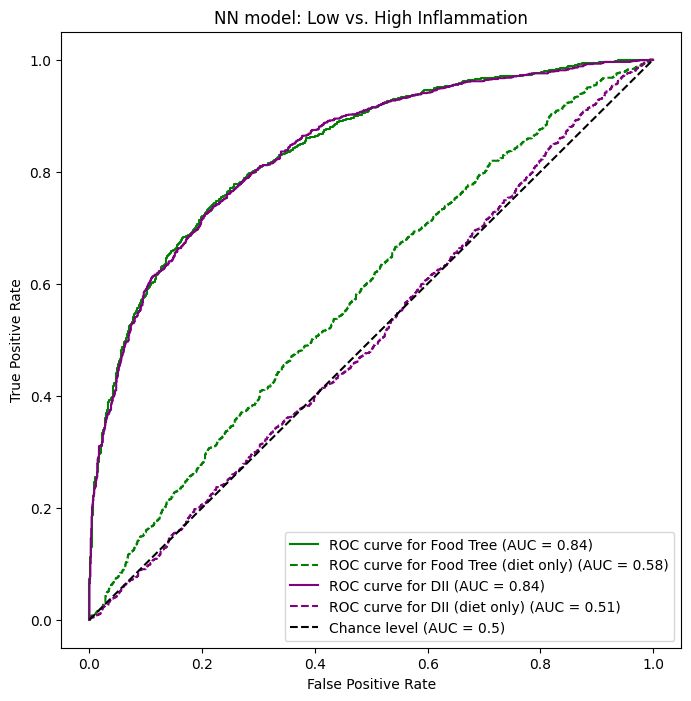

In [15]:
# plot all
fig, ax = plt.subplots(figsize=(8, 8))


RocCurveDisplay.from_predictions(
        y_test[:, 0],
        y_score_foodtree[:, 0],
        name=f"ROC curve for Food Tree",
        color="green",
        ax=ax,
        #plot_chance_level=(class_id == 0),
    )

RocCurveDisplay.from_predictions(
        y_test[:, 0],
        y_score_foodtree_diet[:, 0],
        name=f"ROC curve for Food Tree (diet only)",
        color="green",
        linestyle='dashed',
        ax=ax,
        #plot_chance_level=(class_id == 0),
    )

RocCurveDisplay.from_predictions(
        y_test_dii[:, 0],
        y_score_dii[:, 0],
        name=f"ROC curve for DII",
        color="purple",
        ax=ax,
        #plot_chance_level=(class_id == 0),
    )

RocCurveDisplay.from_predictions(
        y_test_dii[:, 0],
        y_score_dii_diet[:, 0],
        name=f"ROC curve for DII (diet only)",
        color="purple",
        linestyle='dashed',
        ax=ax,
        plot_chance_level=(0.5),
    )

ax.set(
    xlabel="False Positive Rate",
    ylabel="True Positive Rate",
    title="NN model: Low vs. High Inflammation",
)
plt.savefig('nn_dii_vs_food_tree.png', bbox_inches='tight',dpi=1000)